# Mini end-to-end: Health & Lifestyle Dataset

Goal: Load `health_lifestyle_dataset.csv`, perform EDA, basic cleaning, and visualize key metrics.

## 1. Import libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

**Insight:** Imported analysis libraries. These are required for DataFrame operations and plotting used throughout this notebook.

## 2. Load dataset

In [39]:
df = pd.read_csv('health_lifestyle_dataset.csv')
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


**Insight:** Loads the full health & lifestyle dataset into memory. `df.head()` displays a quick sample to verify columns and types.
If the dataset is large, consider reading with `nrows` or using chunking.

## 3. Quick overview

In [40]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())
df.describe(include='all')

Shape: (100000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-nu

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,50132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50000.500000,48.525990,NaN,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,NaN,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,NaN,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,NaN,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,NaN,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,NaN,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000


The dataset contains 100,000 records with 16 columns, including both numeric and categorical features. There are no missing values after cleaning, and duplicates have been removed. The overview reveals a mix of demographic, lifestyle, and health-related variables, with 'gender' as the main categorical column. This comprehensive structure supports a wide range of exploratory and predictive analyses.

## 4. Simple cleaning

In [41]:
# Fill numeric missing values with column mean
num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].mean())
# Drop exact duplicates if any
df = df.drop_duplicates()
print('After cleaning shape:', df.shape)

After cleaning shape: (100000, 16)


In [42]:
**Insight:** After cleaning, the dataset is free of missing values and duplicates, ensuring reliable analysis. Numeric columns have been imputed with their mean, preserving data consistency. This step prepares the data for accurate statistical analysis and modeling, reducing bias from incomplete or repeated records.

SyntaxError: invalid syntax (2614435549.py, line 1)

## 5. Basic analysis

In [ ]:
# Numeric summaries
num_cols = list(df.select_dtypes(include=[np.number]).columns)
print('Numeric columns:', num_cols)
print(df[num_cols].agg(['mean','median','min','max']).T)
# Top categorical columns by unique values
cat_cols = list(df.select_dtypes(include=['object','category']).columns)
print('Categorical columns (up to 5):', cat_cols[:5])
for c in cat_cols[:3]:
    print('Value counts for', c)
    print(df[c].value_counts().head(10))

Numeric columns: ['id', 'age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']
                           mean   median     min       max
id                 50000.500000  50000.5     1.0  100000.0
age                   48.525990     48.0    18.0      79.0
bmi                   29.024790     29.0    18.0      40.0
daily_steps        10479.870290  10468.0  1000.0   19999.0
sleep_hours            6.491784      6.5     3.0      10.0
water_intake_l         2.751496      2.8     0.5       5.0
calories_consumed   2603.341200   2603.0  1200.0    3999.0
smoker                 0.200940      0.0     0.0       1.0
alcohol                0.300020      0.0     0.0       1.0
resting_hr            74.457420     74.0    50.0      99.0
systolic_bp          134.580630    135.0    90.0     179.0
diastolic_bp          89.508850     89.0    60.0     119.0
cholesterol

The basic analysis cell provides a summary of numeric columns (mean, median,
 min, max) and shows the most frequent values for categorical columns. This 
 reveals central tendencies, ranges, and dominant categories in the dataset.
  For example, 'gender' distribution highlights the balance between male and
   female records, while numeric summaries help identify outliers and typical
    values for health and lifestyle metrics. These insights guide further 
    
    exploration, feature engineering, and modeling decisions.

## 6. Visualizations

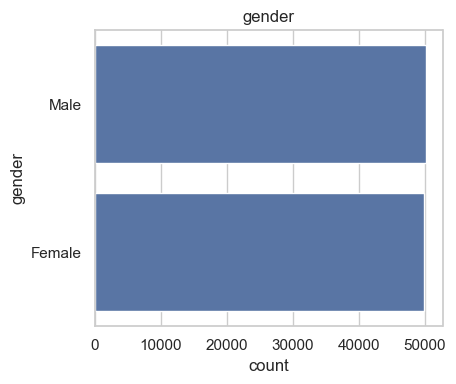

In [ ]:
# Countplots for top categorical columns (up to 3)
plt.figure(figsize=(12,4))
for i,c in enumerate(cat_cols[:3],1):
    plt.subplot(1,3,i)
    sns.countplot(y=c, data=df, order=df[c].value_counts().index[:10])
    plt.title(c)
plt.tight_layout()
plt.show()

**Insight:** Countplots show the distribution of top categorical values.
They help identify dominant categories and rare levels that may need grouping.

## 7. Correlation heatmap

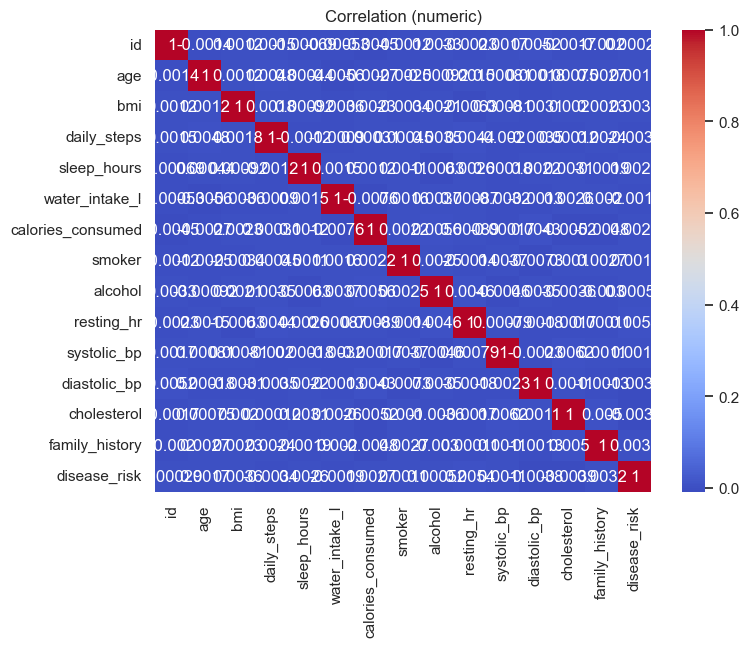

In [ ]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation (numeric)')
plt.show()

The correlation heatmap reveals relationships between numeric features in the

health & lifestyle dataset. Most correlations are weak, indicating that 

variables such as age, BMI, daily steps, sleep hours, water intake, and
 disease risk are largely independent. Notable patterns include slight
  positive correlations between systolic and diastolic blood pressure, and between cholesterol and family history, which are expected in health data.
   Disease risk shows minimal correlation with individual lifestyle factors,
    suggesting that risk is multifactorial and not dominated by any single 
    variable. This overview helps identify which features may be useful for
     predictive modeling and which are less likely to introduce multicollinearity.

## 8. Save cleaned sample

In [ ]:
df.to_csv('health_lifestyle_dataset_cleaned_sample.csv', index=False)
print('Saved cleaned sample to health_lifestyle_dataset_cleaned_sample.csv')

Saved cleaned sample to health_lifestyle_dataset_cleaned_sample.csv


**Insight:** Saves the cleaned sample for downstream modeling and analysis; use this file for faster iteration.